In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
import numdifftools as nd

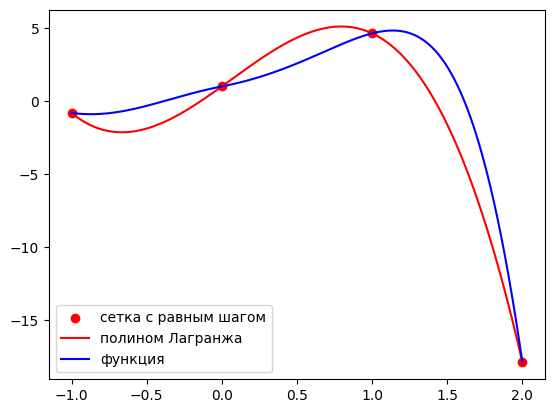

максимум модуля  977.0402715654519
максимум ошибки  4.310616606838776


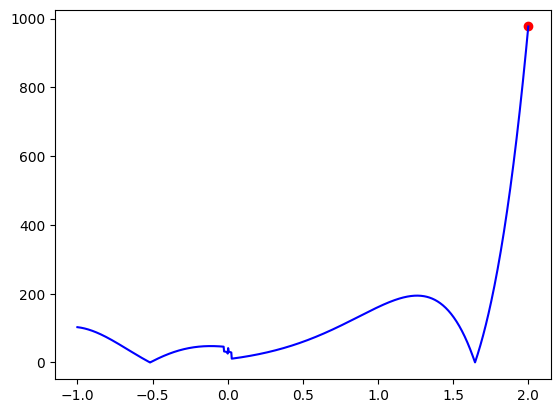

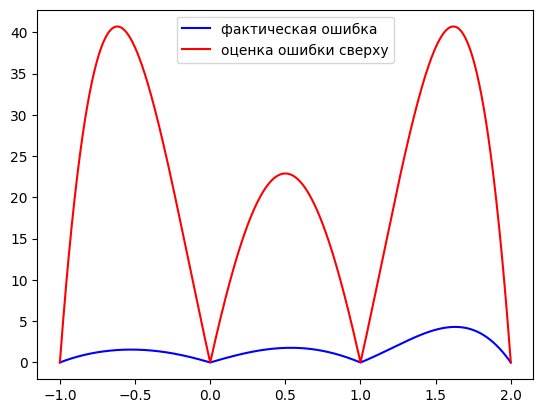

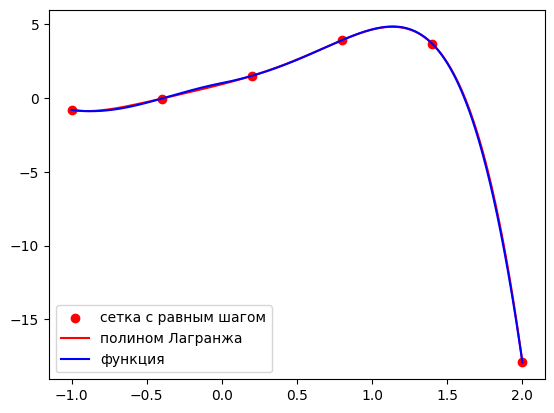

максимум модуля  13797.726214303491
максимум ошибки  0.22900926525397658


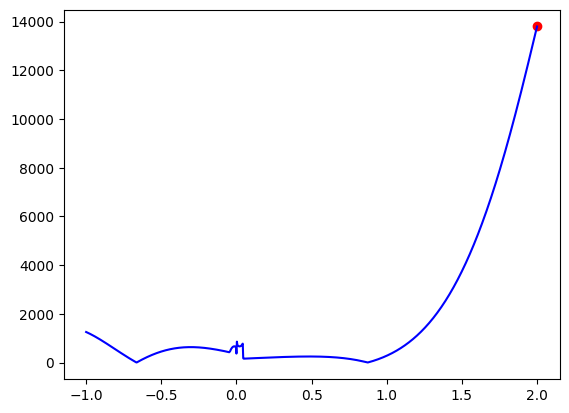

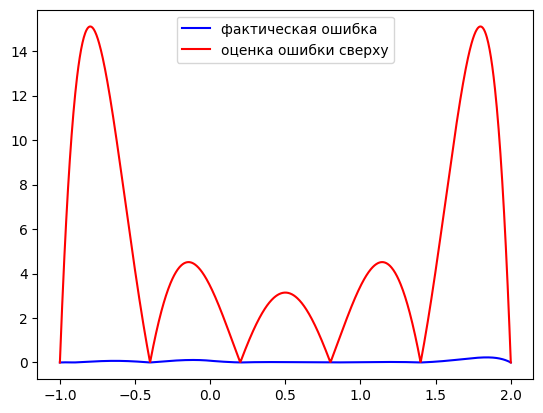

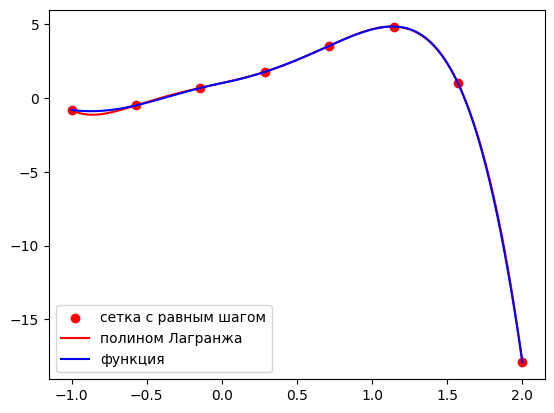

максимум модуля  1662362486.8320675
максимум ошибки  0.24090176673363617


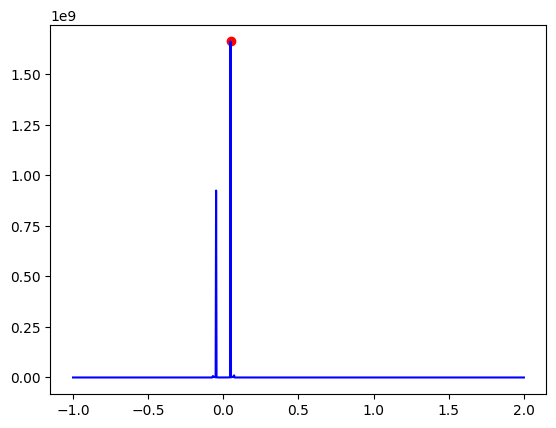

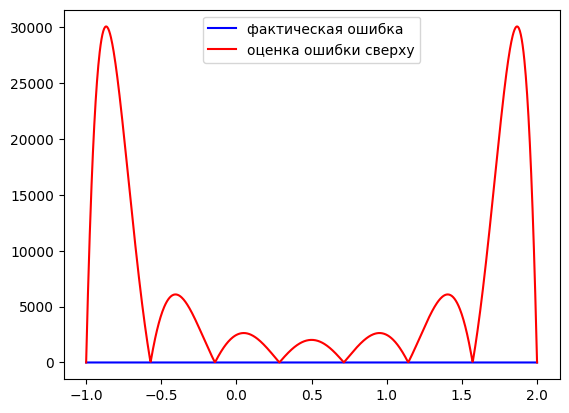

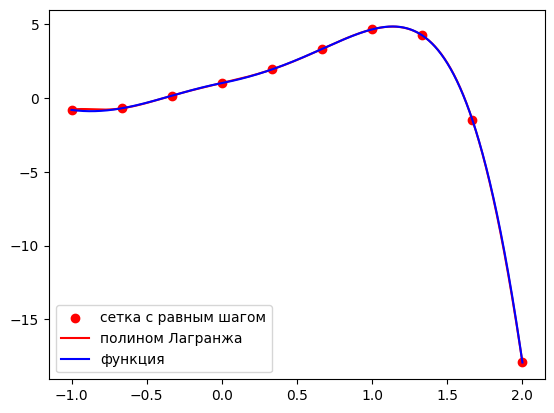

максимум модуля  15706906148109.01
максимум ошибки  0.13798263792176113


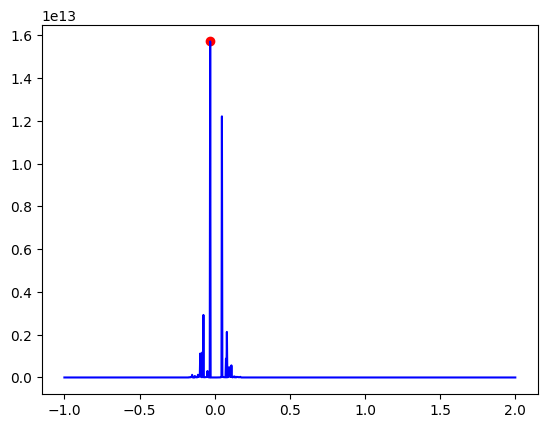

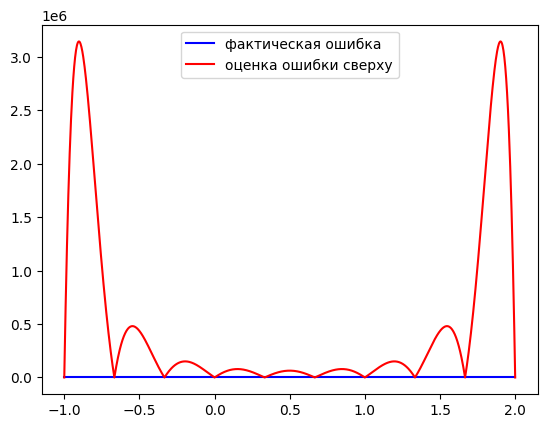

In [19]:
def f(x):
    return (3 + x) ** np.abs(x) * np.sin(2 * x) + 1

m = 7
a,b = -1,2

def Q(x):
    Q = 0
    omega = 1
    for i in range(m+1):
        l = 1
        for j in range(m+1):
            if j != i:
                l = l*((x-nodes[j])/(nodes[i]-nodes[j]))
        Q = Q + l*f(nodes[i])
        omega = omega*(x-nodes[i])
    return Q, omega

for m in [3, 5, 7, 9]:
    nodes = np.linspace(a,b,m+1)

    xx = np.linspace(a,b,1000)
    
    res = Q(xx)
    Qxx = res[0]
    omegaxx = res[1]
    fxx = f(xx)
    
    plt.scatter(nodes,Q(nodes)[0],color='red',label='сетка с равным шагом')
    plt.plot(xx,Qxx,color='red',label='полином Лагранжа')
    plt.plot(xx,fxx,color='blue',label='функция')
    plt.legend()
    plt.show()
    
    errabs = np.abs(Qxx-fxx)
    cmax = np.argmax(errabs)
    emax = errabs[cmax]
    
    dfdxm = np.abs(nd.Derivative(f,n=m+1)(xx))
    c = np.argmax(dfdxm)
    M = dfdxm[c]
    
    print('максимум модуля ',M)
    print('максимум ошибки ',emax)
    
    plt.plot(xx,dfdxm,color='blue',label='модуль производной')
    plt.scatter(xx[c],M,color='red')
    plt.show()
    
    errupper = M/factorial(m+1)*np.abs(omegaxx)
    
    plt.plot(xx,errabs,label='фактическая ошибка',color='blue')
    plt.plot(xx,errupper,label='оценка ошибки сверху',color='red')
    plt.legend()
    plt.show()